In [84]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_palette(sns.color_palette("Set2"))

In [85]:
pd.DataFrame((np.random.random(100) - 0.5) * 2).describe()

,0
count,100.000000
mean,0.047401
std,0.592501
min,-0.959320
25%,-0.520068
50%,0.123837
75%,0.564823
max,0.973848


In [86]:
# Parameters
N = 100              # Number of particles
m = 1.0            # Mass
gamma = 1      # Friction coefficient
#k = 4.0            # Spring constant
#k = 4.0            # Spring constant (u_0 in the notes)
k = 10.0            # Spring constant (u_0 in the notes)
kb = 1.0           # Boltzmann Constant
#T = 1.0            # Temperature
T = 1.0            # Temperature
dt = 0.01         # Time step, with this choice is guarantee that the integral is good
#total_time = 100  # Total simulation time
total_time = 10000  # Total simulation time

# Initial conditions = 0
x0 = np.zeros(N)   # Initial positions

# Initial conditions = random between 1 and -1
x0 = (np.random.random(N) - 0.5) * 2



# Function to generate Gaussian white noise
def generate_noise(dt, size):
    return np.sqrt(2 * kb * T /dt/m/gamma) * np.random.normal(size=size)


# Initialize arrays, everything to zero
time = np.arange(0, total_time, dt)
x = np.zeros((N, len(time)))


# Set initial conditions
x[:, 0] = x0

# n times iterations
# quadratic potential
#for i in range(1, len(time)):
#    noise = generate_noise(dt, N)
#    x[:, i] = x[:, i - 1] - k/(m*gamma) * x[:, i - 1] * dt + noise*dt

# second potential
for i in range(1, len(time)):
    noise = generate_noise(dt, N)
    x[:, i] = x[:, i - 1] - 2*k*(x[:, i - 1]**2 - 1)*2*x[:, i - 1]/\
        (m*gamma)*dt + noise*dt

def boltz(x):
    return 1./np.sqrt(2*np.pi) * np.exp(-0.5*x**2)

def potenziale(x):
    return k*(x**2 -1)**2

x_values = np.linspace(-2., 2., 100)
#y_values = boltz(x_values)
y_values = potenziale(x_values)



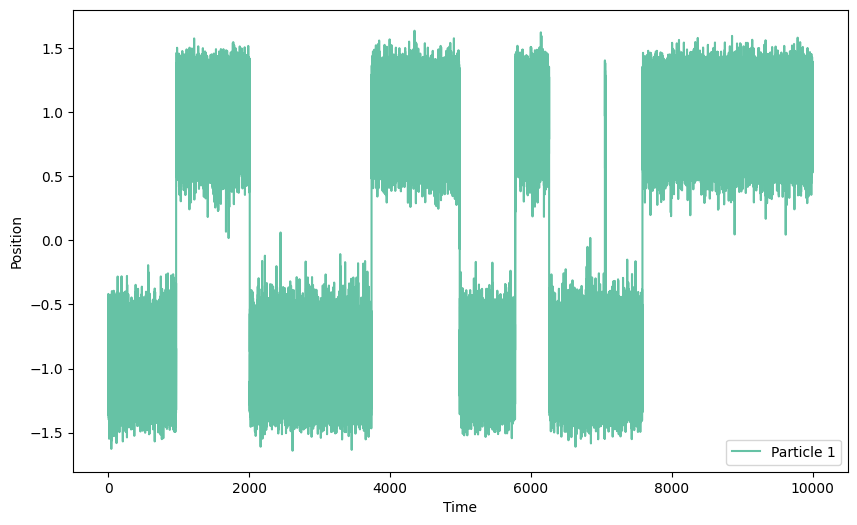

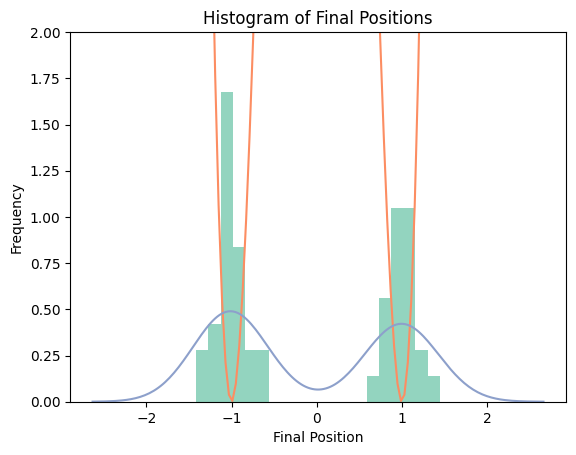

In [87]:
# Plot the results
plt.figure(figsize=(10, 6))
for j in range(1):
    plt.plot(time, x[j, :], label=f'Particle {j + 1}')

plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()


final_positions = x[:, N]
num_bins= 20
plt.hist(final_positions, bins=num_bins, density=True, alpha=0.7)
plt.plot(x_values, y_values, label='Function: $y=x^2$')
sns.kdeplot(final_positions, label='KDE')
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.ylim(0, 2)
plt.title('Histogram of Final Positions')
plt.show()


In [88]:
float(x.mean())

-0.019949112451248915

In [89]:
# n times iterations
# quadratic potential
#for i in range(1, len(time)):
#    noise = generate_noise(dt, N)
#    x[:, i] = x[:, i - 1] - k/(m*gamma) * x[:, i - 1] * dt + noise*dt

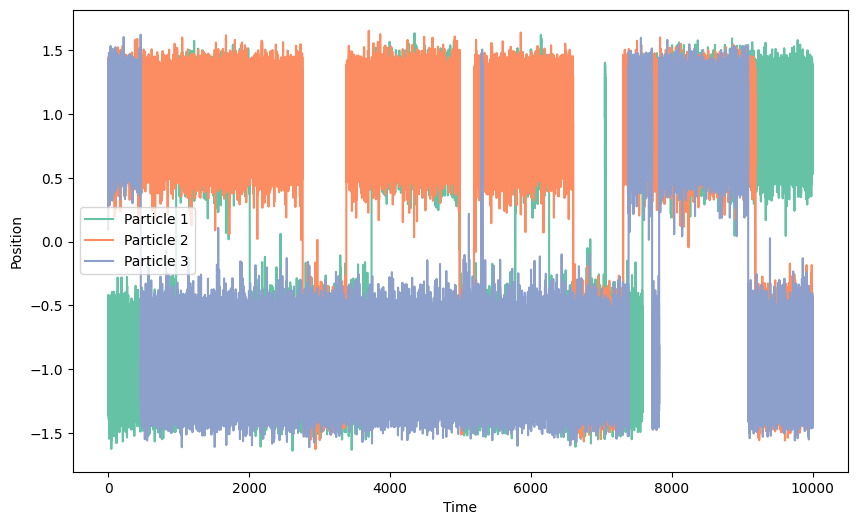

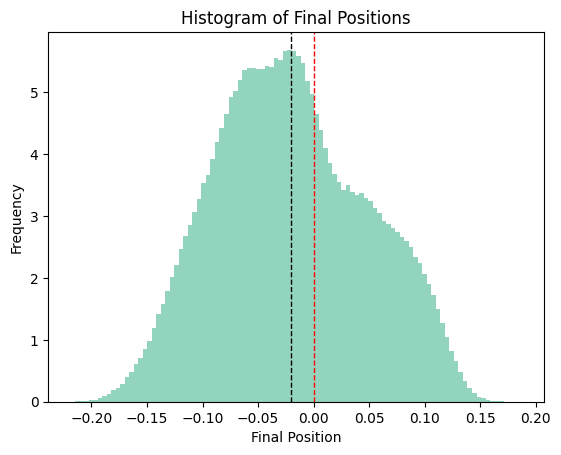

-0.01994911245124894


In [90]:
# Plot the results
mean_positions = x.mean(axis=0)
plt.figure(figsize=(10, 6))
for j in range(3):
    plt.plot(time, x[j, :], label=f'Particle {j + 1}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()
num_bins= 100
plt.hist(mean_positions, bins=num_bins, density=True, alpha=0.7)
plt.axvline(mean_positions.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(0, color='r', linestyle='dashed', linewidth=1)

#plt.plot(x_values, y_values, label='Function: $y=x^2$')
plt.xlabel('Final Position')
plt.ylabel('Frequency')
plt.title('Histogram of Final Positions')
plt.show()
print(mean_positions.mean())

In [91]:
a = np.array(x > 0, dtype=int) * 2 - 1
evolution = (np.array([ x * x_1 for (x, x_1) in zip(
                       a[:,:-1],
                       a[:,1:])]))
rare_events = (evolution - 1)/(-2)

In [92]:
np.array([np.where( x == -1)[0][0] for x in evolution]).mean() * dt ## mean time 

np.float64(867.8665)

In [175]:
def cumulative_k_transitions(m,k) -> np.array:
    '''
    m must be a matrix particles * times
    and is a one hot encoding of rare events 
    '''
    jumps = np.zeros(m.shape[1])
    for particle in m:
        cs = np.cumsum(particle)
        indices = np.where(cs == k)
        if len(indices[0]) != 0:
            jumps[indices[0][0]] += 1
    return jumps

In [176]:
result = cumulative_k_transitions(rare_events,1)

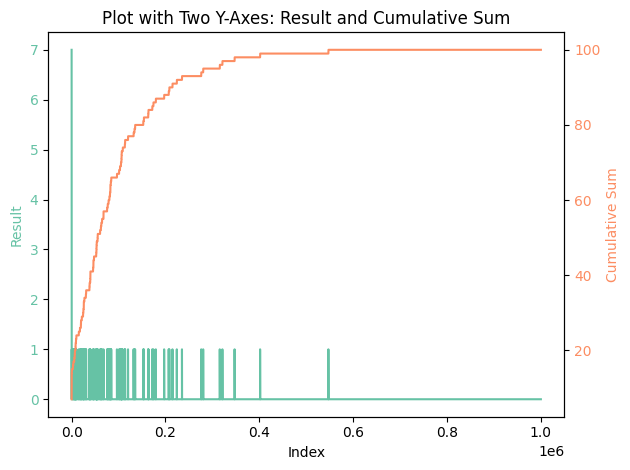

In [161]:
palette = sns.color_palette("Set2")
fig, ax1 = plt.subplots()

ax1.plot(result, color=palette[0], label='Result')  # Use Set2 color
ax1.set_xlabel('Index')
ax1.set_ylabel('Result', color=palette[0])  # Set y-axis color
ax1.tick_params(axis='y', labelcolor=palette[0])

ax2 = ax1.twinx()
ax2.plot(np.cumsum(result), color=palette[1], label='Cumulative Sum')  # Use Set2 color
ax2.set_ylabel('Cumulative Sum', color=palette[1])
ax2.tick_params(axis='y', labelcolor=palette[1])

plt.title("Plot with Two Y-Axes: Result and Cumulative Sum")
fig.tight_layout()
plt.show()

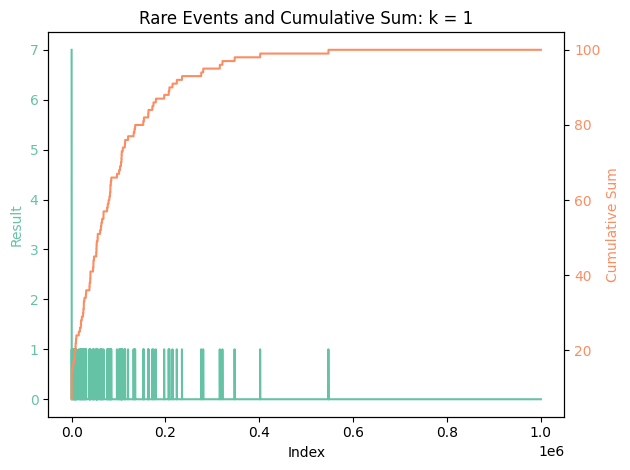

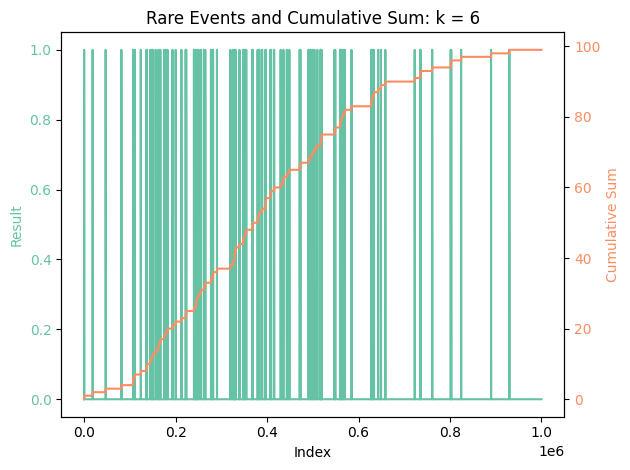

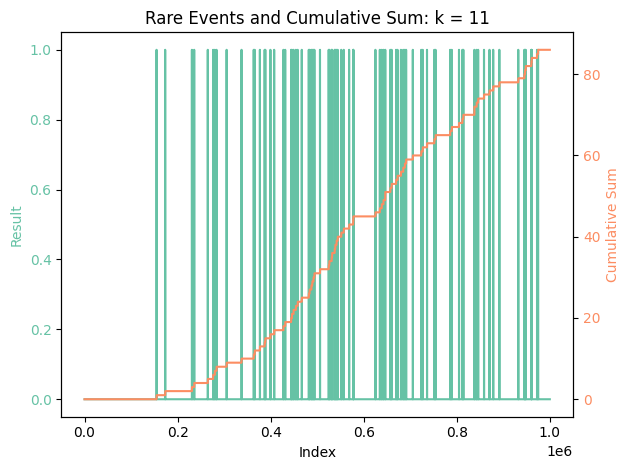

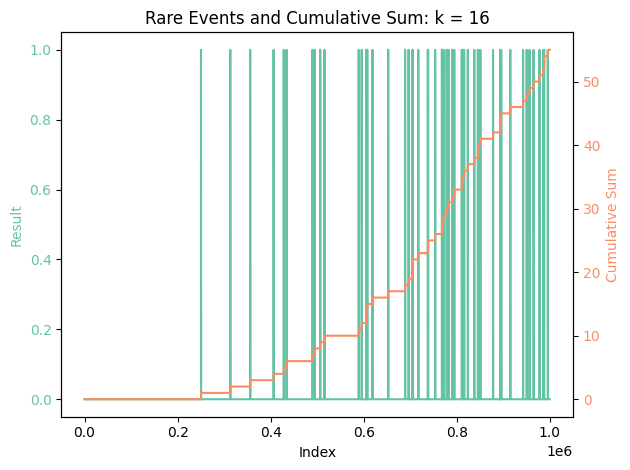

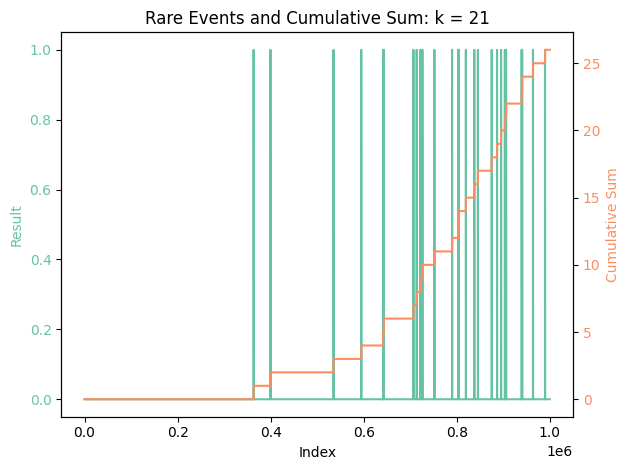

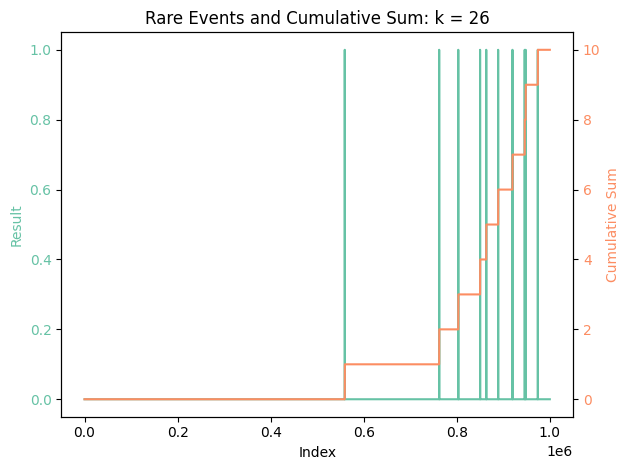

In [178]:
palette = sns.color_palette("Set2")
for k in range(1,30,5):

    result = cumulative_k_transitions(rare_events, k)

    fig, ax1 = plt.subplots()

    ax1.plot(result, color=palette[0], label='Result')  # Use Set2 color
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Result', color=palette[0])  # Set y-axis color
    ax1.tick_params(axis='y', labelcolor=palette[0])

    ax2 = ax1.twinx()
    ax2.plot(np.cumsum(result), color=palette[1], label='Cumulative Sum')  # Use Set2 color
    ax2.set_ylabel('Cumulative Sum', color=palette[1])
    ax2.tick_params(axis='y', labelcolor=palette[1])

    plt.title(f"Rare Events and Cumulative Sum: k = {k}")
    fig.tight_layout()
    plt.show()